In [8]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

# Carregar o dataset MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Pré-processamento
X_train = X_train.reshape((X_train.shape[0], 28 * 28)).astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], 28 * 28)).astype('float32') / 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Definir o modelo
model = Sequential([
    # Dense(512, activation='relu', input_shape=(28 * 28,), kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    Dense(512, activation='relu', input_shape=(28 * 28,)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compilar o modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Treinar o modelo com Early Stopping
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=128, callbacks=[tf.keras.callbacks.EarlyStopping(patience=5)])


Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8088 - loss: 0.6383 - val_accuracy: 0.9600 - val_loss: 0.1257
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9399 - loss: 0.1945 - val_accuracy: 0.9694 - val_loss: 0.0974
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9547 - loss: 0.1462 - val_accuracy: 0.9733 - val_loss: 0.0814
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9591 - loss: 0.1300 - val_accuracy: 0.9764 - val_loss: 0.0756
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9661 - loss: 0.1109 - val_accuracy: 0.9780 - val_loss: 0.0708
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 0.9692 - loss: 0.0981 - val_accuracy: 0.9802 - val_loss: 0.0664
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9709 - loss: 0.0913 - val_accuracy: 0.9780 - val_loss: 0.0732
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9715 - loss: 0.0902 - val_ac

com l2, 0.958
sem L2, 0.984

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Identificar acertos e erros
correct = np.where(y_pred_classes == y_true)[0]
incorrect = np.where(y_pred_classes != y_true)[0]

# Plotar exemplos de acertos
plt.figure(figsize=(10, 5))
for i, correct_idx in enumerate(correct[:5]):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_test[correct_idx].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {y_pred_classes[correct_idx]}, True: {y_true[correct_idx]}")
    plt.axis('off')
plt.suptitle("Acertos")
plt.show()

NameError: name 'model' is not defined

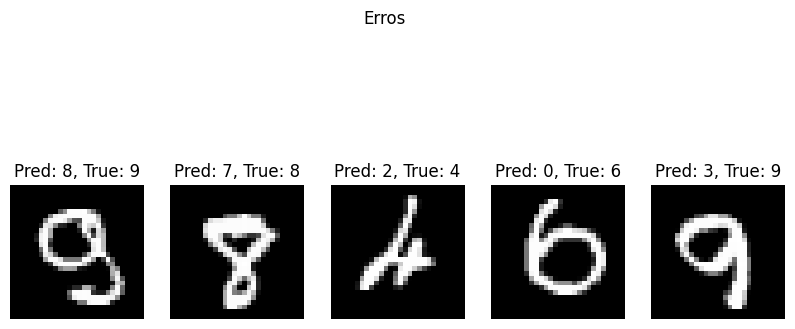

In [ ]:

# Plotar exemplos de erros
plt.figure(figsize=(10, 5))
for i, incorrect_idx in enumerate(incorrect[:5]):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_test[incorrect_idx].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {y_pred_classes[incorrect_idx]}, True: {y_true[incorrect_idx]}")
    plt.axis('off')
plt.suptitle("Erros")
plt.show()
